In [1]:
import pandas as pd

kopo = pd.read_csv("./dataset/feature_regression_example.csv")
kopo.head(5)

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209,N,4,Y,0.208155
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810,Y,2,Y,0.208155
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773,N,4,Y,0.208155


In [2]:
import numpy as np
import pandas as pd
# 모델 라이브러리 선언
from sklearn import datasets, tree
from sklearn import datasets, linear_model

In [3]:
# 모델 정확도 라이브러리 선언
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [4]:
featuresData = pd.read_csv("./dataset./feature_regression_example.csv")
featuresData.head(5)

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209,N,4,Y,0.208155
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810,Y,2,Y,0.208155
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773,N,4,Y,0.208155


In [5]:
featuresData.dtypes##타입 확인

REGIONID         object
PRODUCTGROUP     object
PRODUCT          object
ITEM             object
YEARWEEK          int64
YEAR              int64
WEEK              int64
QTY               int64
HOLIDAY          object
HCLUS             int64
PROMOTION        object
PRO_PERCENT     float64
dtype: object

In [6]:
## 컬럼데이터 str->int변경후 커럼 추가

In [7]:
featuresData["HO_YN"] = np.where(featuresData["HOLIDAY"] == "Y",1,0,)
featuresData["PRO_YN"] = np.where(featuresData["PROMOTION"] == "Y",1,0,)
featuresData.head(5)


,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,HO_YN,PRO_YN
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442,1,1
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442,0,1
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209,N,4,Y,0.208155,0,1
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810,Y,2,Y,0.208155,1,1
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773,N,4,Y,0.208155,0,1


In [8]:
## 타입 변경

In [9]:
featuresData["YEARWEEK"] = featuresData["YEARWEEK"].astype(int)
featuresData["YEAR"] = featuresData["YEAR"].astype(int)
featuresData["WEEK"] = featuresData["WEEK"].astype(int)
featuresData.head(5)


,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,HO_YN,PRO_YN
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442,1,1
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442,0,1
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209,N,4,Y,0.208155,0,1
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810,Y,2,Y,0.208155,1,1
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773,N,4,Y,0.208155,0,1


In [10]:
## 타입 변경확인

In [11]:
featuresData.dtypes

REGIONID         object
PRODUCTGROUP     object
PRODUCT          object
ITEM             object
YEARWEEK          int32
YEAR              int32
WEEK              int32
QTY               int64
HOLIDAY          object
HCLUS             int64
PROMOTION        object
PRO_PERCENT     float64
HO_YN             int32
PRO_YN            int32
dtype: object

In [12]:
featuresData = featuresData[(featuresData.YEARWEEK >= 201501)&(featuresData.YEARWEEK <= 201652)]
featuresData.head(5)

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,HO_YN,PRO_YN
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442,1,1
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442,0,1
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209,N,4,Y,0.208155,0,1
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810,Y,2,Y,0.208155,1,1
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773,N,4,Y,0.208155,0,1


In [13]:
## 상관관계 확인 작업

In [14]:
corrDF = featuresData.corr() ##corr : 상관관계를 확인할수 있는 함수
corrDF

,YEARWEEK,YEAR,WEEK,QTY,HCLUS,PRO_PERCENT,HO_YN,PRO_YN
YEARWEEK,1.000000,0.956598,0.275593,0.112267,-0.071586,0.404889,0.049867,0.205916
YEAR,0.956598,1.000000,-0.016493,0.028931,0.028593,0.321193,-0.031106,0.195931
WEEK,0.275593,-0.016493,1.000000,0.289766,-0.339943,0.329705,0.273710,0.060206
QTY,0.112267,0.028931,0.289766,1.000000,-0.537230,0.700195,0.505932,0.612451
HCLUS,-0.071586,0.028593,-0.339943,-0.537230,1.000000,-0.545619,-0.974601,-0.374072
PRO_PERCENT,0.404889,0.321193,0.329705,0.700195,-0.545619,1.000000,0.487062,0.898554
HO_YN,0.049867,-0.031106,0.273710,0.505932,-0.974601,0.487062,1.000000,0.365148
PRO_YN,0.205916,0.195931,0.060206,0.612451,-0.374072,0.898554,0.365148,1.000000


In [15]:
# 인덱스컬럼 초기화
corrResult = corrDF.reset_index()
corrResult

,index,YEARWEEK,YEAR,WEEK,QTY,HCLUS,PRO_PERCENT,HO_YN,PRO_YN
0,YEARWEEK,1.000000,0.956598,0.275593,0.112267,-0.071586,0.404889,0.049867,0.205916
1,YEAR,0.956598,1.000000,-0.016493,0.028931,0.028593,0.321193,-0.031106,0.195931
2,WEEK,0.275593,-0.016493,1.000000,0.289766,-0.339943,0.329705,0.273710,0.060206
3,QTY,0.112267,0.028931,0.289766,1.000000,-0.537230,0.700195,0.505932,0.612451
4,HCLUS,-0.071586,0.028593,-0.339943,-0.537230,1.000000,-0.545619,-0.974601,-0.374072
5,PRO_PERCENT,0.404889,0.321193,0.329705,0.700195,-0.545619,1.000000,0.487062,0.898554
6,HO_YN,0.049867,-0.031106,0.273710,0.505932,-0.974601,0.487062,1.000000,0.365148
7,PRO_YN,0.205916,0.195931,0.060206,0.612451,-0.374072,0.898554,0.365148,1.000000


In [16]:
# 상관관계 계수 비율 선정
featuresStd = 0.5
# Feature 선택
features = corrResult[ (corrResult.QTY != 1) &
(abs(corrResult.QTY) > featuresStd)]["index"].tolist()
features

['HCLUS', 'PRO_PERCENT', 'HO_YN', 'PRO_YN']

In [17]:
label = ['QTY']
label

['QTY']

In [18]:
# 데이터 분리
yearweekStd = 201630


In [19]:
trainingData_features = featuresData[featuresData.YEARWEEK <= yearweekStd][features]
trainingData_label = featuresData[featuresData.YEARWEEK <= yearweekStd][label]
testData_features = featuresData[featuresData.YEARWEEK > yearweekStd][features]
testData_label = featuresData[featuresData.YEARWEEK > yearweekStd]

In [20]:
## 모델 적용 -->(모델선언 및 학습)

In [21]:
# Define Model
model_method = tree.DecisionTreeClassifier()

# Learning (Feature & Label)
model = model_method.fit(trainingData_features,
trainingData_label)

In [22]:
## 예측

In [23]:
predict = model.predict(testData_features)
predict

array([ 973,  973,   16,  968,  968,  968,  973,  973,  973,  973, 1172,
        973,   16, 2033, 2033, 2033, 2033, 2033,  973,  973,  973,  968],
      dtype=int64)

In [24]:
## 데이터 정리

In [25]:
# 데이터프레임으로 변환
predictData = pd.DataFrame(predict)
predictData.head(5)

,0
0,973
1,973
2,16
3,968
4,968


In [26]:
##컬럼명 주입
predictData.columns = ["PREDICT"]
predictData.head(5)

,PREDICT
0,973
1,973
2,16
3,968
4,968


In [27]:
testData_features.head(5)

,HCLUS,PRO_PERCENT,HO_YN,PRO_YN
83,4,0.280258,0,1
84,4,0.280258,0,1
85,4,0.000000,0,0
86,1,0.308584,1,1
87,1,0.308584,1,1


In [28]:
testData_label.head(5)

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,HO_YN,PRO_YN
83,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201631,2016,31,1522,N,4,Y,0.280258,0,1
84,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201632,2016,32,2100,N,4,Y,0.280258,0,1
85,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201633,2016,33,43,N,4,N,0.000000,0,0
86,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201634,2016,34,1700,Y,1,Y,0.308584,1,1
87,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201635,2016,35,1514,Y,1,Y,0.308584,1,1


In [29]:
##컬럼명 주입
predictData.columns = ["PREDICT"]
predictData.head(5)
##테스트 데이터와 예측값 합치기
finalResult = pd.concat([testData_label, predictData], axis = 1)

finalResult.head(5)
##인덱스 삭제 후 다시 테스트 데이터와 예측값 합치기
testData_label = testData_label.reset_index(drop = True)

testData_label.head(5)

finalResult = pd.concat([testData_label, predictData], axis = 1)

finalResult

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,HO_YN,PRO_YN,PREDICT
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201631,2016,31,1522,N,4,Y,0.280258,0,1,973
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201632,2016,32,2100,N,4,Y,0.280258,0,1,973
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201633,2016,33,43,N,4,N,0.000000,0,0,16
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201634,2016,34,1700,Y,1,Y,0.308584,1,1,968
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201635,2016,35,1514,Y,1,Y,0.308584,1,1,968
5,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201636,2016,36,1501,Y,1,Y,0.308584,1,1,968
6,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201637,2016,37,1491,N,4,Y,0.308584,0,1,973
7,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201638,2016,38,806,N,4,Y,0.308584,0,1,973
8,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201639,2016,39,2111,N,4,Y,0.280258,0,1,973
9,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201640,2016,40,2400,N,4,Y,0.280258,0,1,973


In [30]:
#finalResult.to_csv("./finalResult0509.csv")

In [31]:
## 결과검증

In [32]:
### MAE
mean_absolute_error(finalResult['QTY'], finalResult['PREDICT'])

607.0454545454545

In [33]:
### RMSE (MSE)
import math
math.sqrt(mean_squared_error(finalResult['QTY'], finalResult['PREDICT']))

703.6478005882824

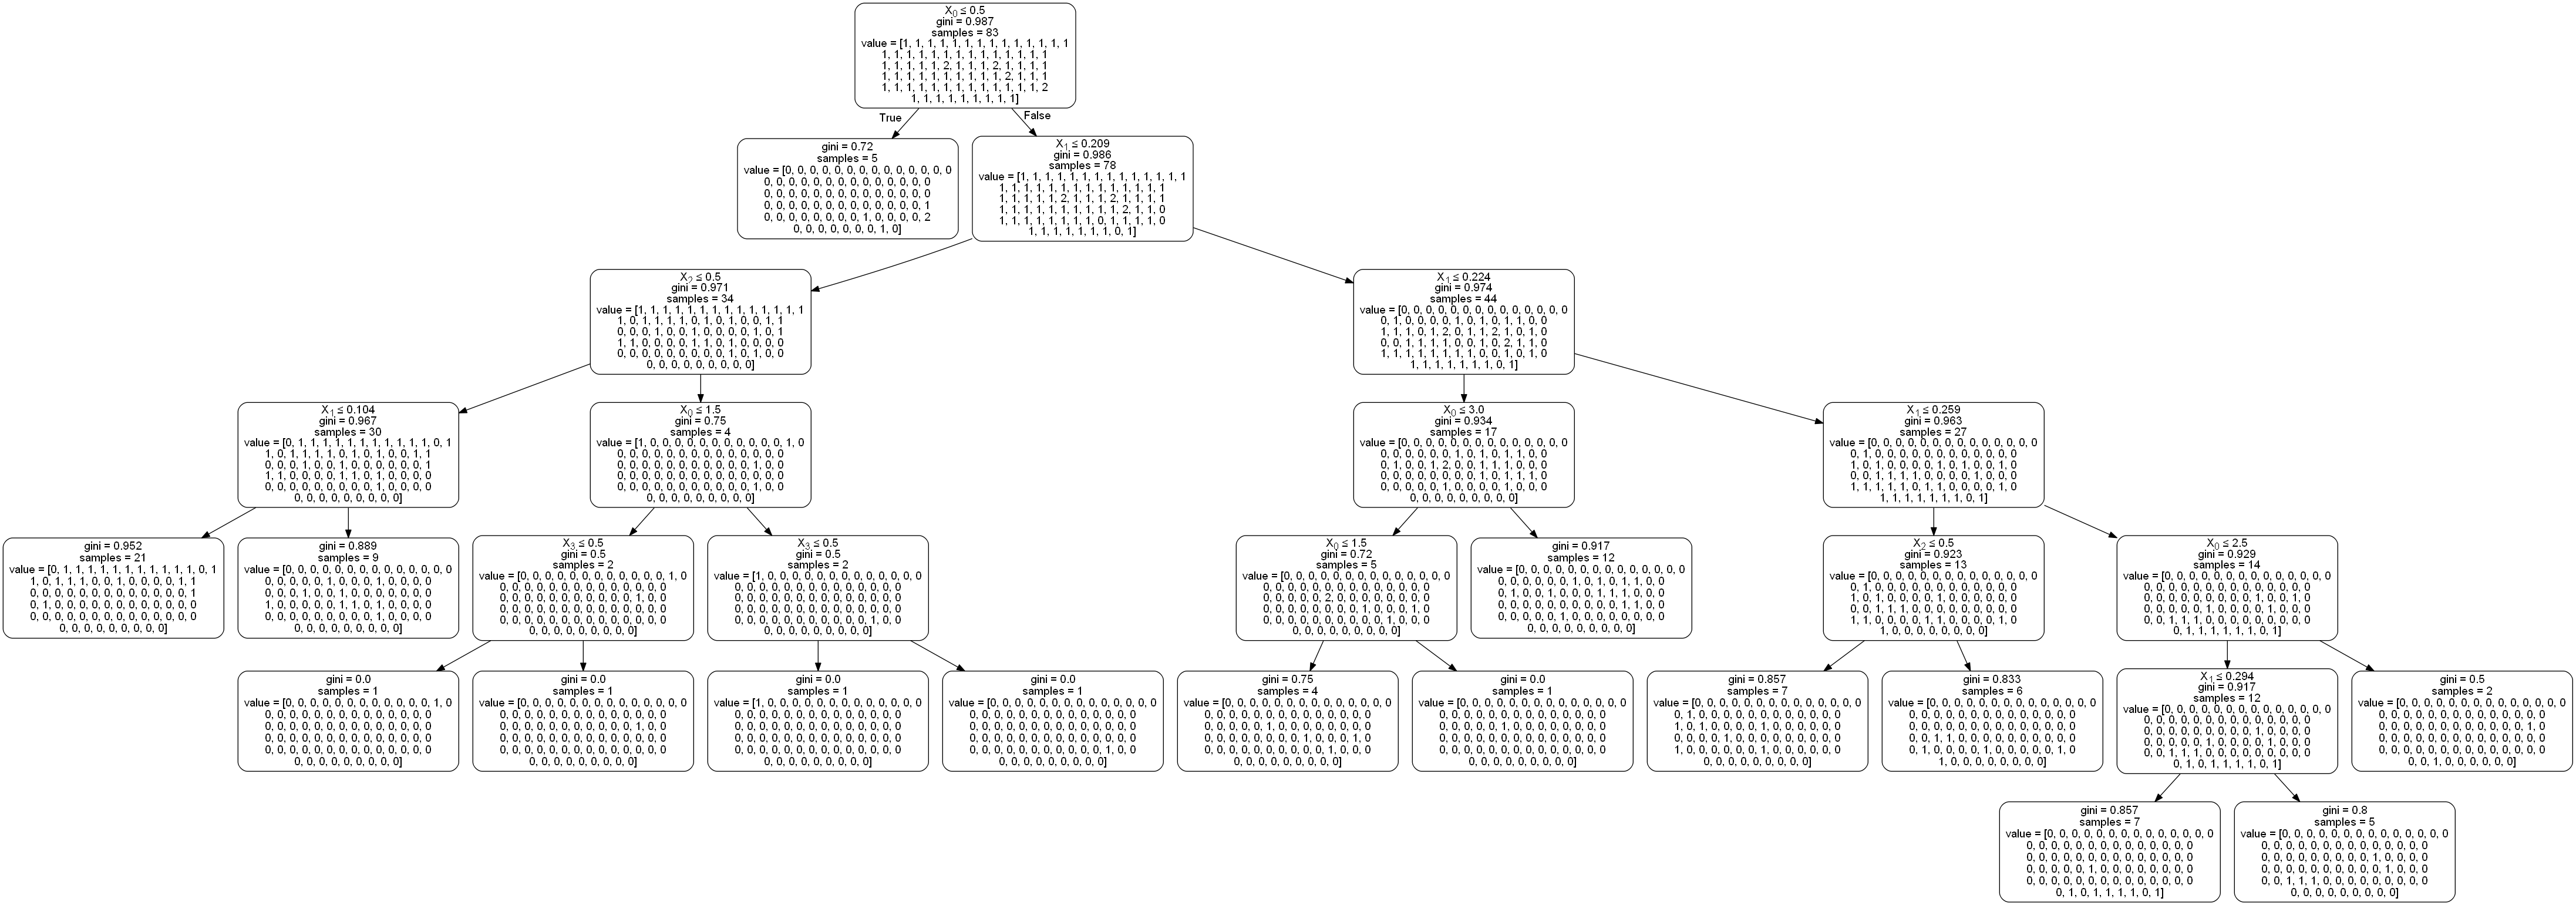

In [34]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, 
                rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [35]:
# Define Model
#model_method = tree.DecisionTreeClassifier()
model_method1 = linear_model.LinearRegression()
# Learning (Feature & Label)
model1 = model_method1.fit(trainingData_features,
trainingData_label)

In [36]:
predict1 = model1.predict(testData_features)
predict1

array([[1411.29171929],
       [1411.29171929],
       [ 300.43091536],
       [2004.96200456],
       [2004.96200456],
       [2004.96200456],
       [1586.12154967],
       [1586.12154967],
       [1411.29171929],
       [1411.29171929],
       [1799.54021119],
       [1411.29171929],
       [ 300.43091536],
       [2734.87329525],
       [2734.87329525],
       [2734.87329525],
       [2734.87329525],
       [2734.87329525],
       [2285.44087736],
       [1856.31310796],
       [1856.31310796],
       [2275.15356285]])

In [37]:
predictData1 = pd.DataFrame(predict1)
predictData1.head(5)

,0
0,1411.291719
1,1411.291719
2,300.430915
3,2004.962005
4,2004.962005


In [38]:
##컬럼명 주입
predictData1.columns = ["PREDICT2"]
predictData1.head(5)

,PREDICT2
0,1411.291719
1,1411.291719
2,300.430915
3,2004.962005
4,2004.962005


In [39]:



##인덱스 삭제 후 다시 테스트 데이터와 예측값 합치기
finalResult = finalResult.reset_index(drop = True)

finalResult = pd.concat([finalResult, predictData1], axis = 1)

finalResult

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,HO_YN,PRO_YN,PREDICT,PREDICT2
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201631,2016,31,1522,N,4,Y,0.280258,0,1,973,1411.291719
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201632,2016,32,2100,N,4,Y,0.280258,0,1,973,1411.291719
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201633,2016,33,43,N,4,N,0.000000,0,0,16,300.430915
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201634,2016,34,1700,Y,1,Y,0.308584,1,1,968,2004.962005
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201635,2016,35,1514,Y,1,Y,0.308584,1,1,968,2004.962005
5,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201636,2016,36,1501,Y,1,Y,0.308584,1,1,968,2004.962005
6,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201637,2016,37,1491,N,4,Y,0.308584,0,1,973,1586.121550
7,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201638,2016,38,806,N,4,Y,0.308584,0,1,973,1586.121550
8,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201639,2016,39,2111,N,4,Y,0.280258,0,1,973,1411.291719
9,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201640,2016,40,2400,N,4,Y,0.280258,0,1,973,1411.291719


In [40]:
mean_absolute_error(finalResult['QTY'], finalResult['PREDICT2'])

566.617239476098

In [41]:
### RMSE (MSE)
import math
math.sqrt(mean_squared_error(finalResult['QTY'], finalResult['PREDICT2']))

722.6052639386677

In [42]:
### R2
r2_score(finalResult['QTY'], finalResult['PREDICT2']) 

-0.11834080332946595

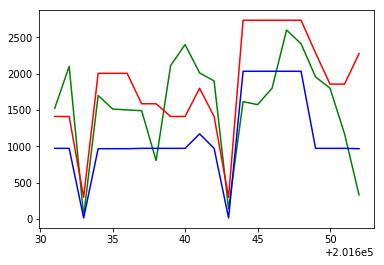

In [43]:
import matplotlib.pyplot as plt

%matplotlib inline

x=finalResult['YEARWEEK']
y1=finalResult['QTY']
y2=finalResult['PREDICT']
y3=finalResult['PREDICT2']
plt.plot(x,y1,"g")
plt.plot(x,y2,"b")
plt.plot(x,y3,"r")